In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Загрузка данных
### Датасет triplets_data

In [3]:
triplets_data = pd.read_csv('triplets_data.csv', index_col=0)
triplets_data.head()

,user_id,song_id,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBNZDC12A6D4FC103,1


In [4]:
triplets_data.shape

(48373585, 3)

In [6]:
print(f'Количество уникальных пользователей: {triplets_data.user_id.nunique()}')
print(f'Количество уникальных песен: {triplets_data.song_id.nunique()}')

Количество уникальных пользователей: 1019318
Количество уникальных песен: 384546


In [9]:
triplets_data.describe().round(2)

,play_count
count,48373585.00
mean,1.93
std,1.65
min,1.00
25%,1.00
50%,1.00
75%,2.00
max,9.00


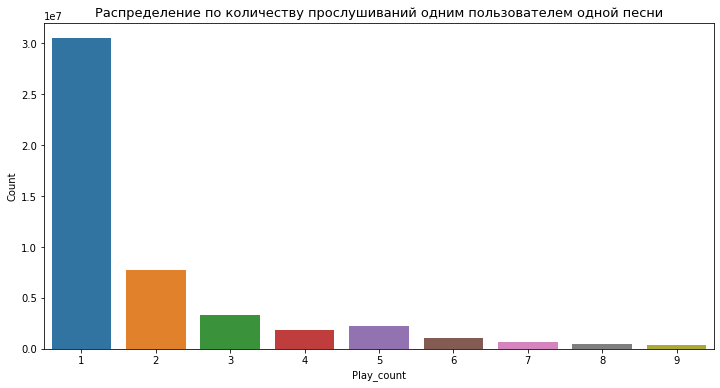

In [10]:
fig = plt.figure(figsize = (12, 6))

sns.countplot(x='play_count', data=triplets_data);

plt.title('Распределение по количеству прослушиваний', fontsize=13);
plt.ylabel('Count', fontsize=10);
plt.xlabel('Play_count',  fontsize=10);

Посмотрим на общее количество прослушанных песен для каждого пользователя.

In [167]:
song_count = triplets_data.groupby('user_id', as_index=False).agg({'song_id': 'count', 'play_count': 'sum'}) \
                                                             .rename(columns={'song_id': 'count_song'}) \
                                                             .sort_values(by='count_song', ascending=False)
song_count.head()

,user_id,count_song,play_count
941420,ec6dfcf19485cb011e0b22637075037aae34cf26,4400,5260
559999,8cb51abc6bf8ea29341cb070fe1e1af5e4c3ffcc,1651,2538
1015155,fef771ab021c200187a419f5e55311390f850a50,1614,2504
358880,5a3417a1955d9136413e0d293cd36497f5e00238,1604,1732
768700,c1255748c06ee3f6440c51c439446886c7807095,1566,3176


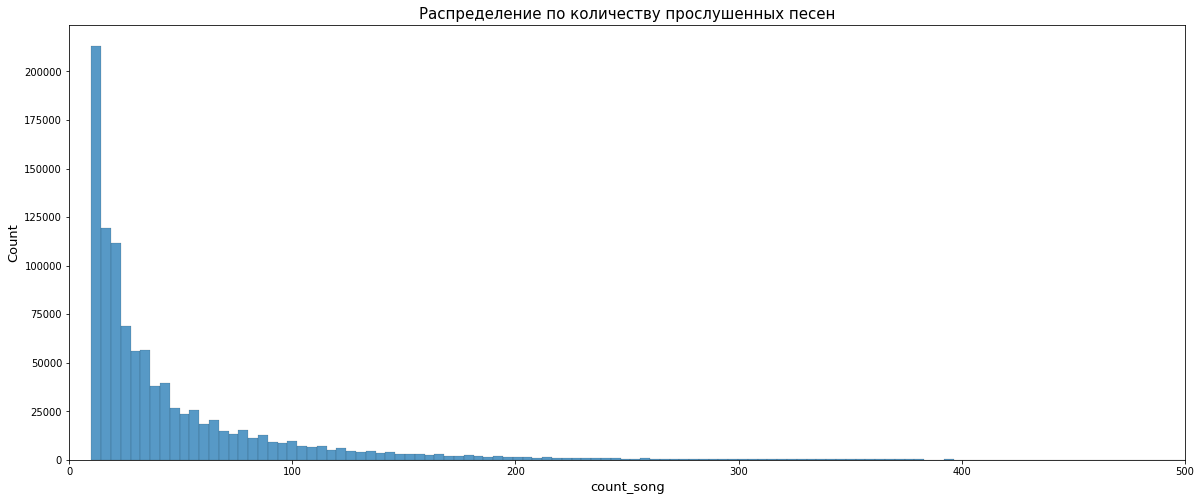

In [8]:
fig = plt.figure(figsize = (20, 8))

ax = sns.histplot(x='count_song', data=song_count, bins=1000);

plt.xlim(0, 500)

plt.title('Распределение по количеству прослушенных песен', fontsize=15);
plt.ylabel('Count', fontsize=13);
plt.xlabel('count_song',  fontsize=13);

Из построенного распределения видно, что большая часть пользоватлей прослушала от 10 до 100 песен.

### Датасет song_data

In [14]:
song_data = pd.read_csv('song_data.csv')
song_data.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [15]:
song_data.shape

(1000000, 5)

Посмотрим на основные характеристики данных:

In [18]:
print(f'Количество уникальных песен: {song_data.song_id.nunique()}')
print(f'Количество уникальных исполнителей: {song_data.artist_name.nunique()}\n')
print(f'Минимальный год выхода трека: {song_data.year[song_data.year > 0].min()}')
print(f'Максимальный год выхода трека: {song_data.year[song_data.year > 0].max()}')
print(f'Количество треков, для которых определен год: {song_data.song_id[song_data.year > 0].count()}')

Количество уникальных песен: 999056
Количество уникальных исполнителей: 72665

Минимальный год выхода трека: 1922
Максимальный год выхода трека: 2011
Количество треков, для которых определен год: 515576


#### Удаляем дубли
В данном датасете присутствуют дубли песен, которые необходимо удалить.

In [19]:
song_data.groupby('song_id', as_index=False).agg({'artist_name': 'count'}).rename(columns={'artist_name': 'count_song_id'}) \
                                            .sort_values(by='count_song_id', ascending=False)

,song_id,count_song_id
824667,SOUYQYY12AF72A000F,3
476252,SOLNCTS12A8C1405EF,3
665418,SOQNMCD12A8C1383D4,3
68469,SOBPAEP12A58A77F49,3
827438,SOVASUH12A67021B44,3
...,...,...
333168,SOHXMHZ12A5891FFDF,1
333169,SOHXMIP12AAF3B3C24,1
333170,SOHXMJG12AB0182DA9,1
333171,SOHXMJO12AB018F837,1


In [20]:
song_data = song_data.drop_duplicates(['song_id'])
song_data.shape

(999056, 5)

### Удаление неверно объединенных пар song_id и track_id

In [23]:
sid_mismatches = pd.read_csv('sid_mismatches.csv', index_col=0)
sid_mismatches.head()

,song_id,track_id
0,SOCMRBE12AB018C546,TRMMREB12903CEB1B1
1,SOLPHZY12AC468ABA8,TRMMBOC12903CEB46E
2,SONGHTM12A8C1374EF,TRMMITP128F425D8D0
3,SONGXCA12A8C13E82E,TRMMAYZ128F429ECE6
4,SOMBCRC12A67ADA435,TRMMNVU128EF343EED


In [24]:
sid_mismatches.shape

(19093, 2)

In [25]:
song_data = song_data[~song_data.song_id.isin(sid_mismatches.song_id)]
song_data.shape

(980144, 5)

### Датасет unique_tracks

In [26]:
unique_tracks = pd.read_csv('unique_tracks.csv', index_col=0)
unique_tracks.head()

,track_id,song_id,artist_name,song_title
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [27]:
unique_tracks.shape

(1000000, 4)

In [28]:
print(f'Количество уникальных song_id: {unique_tracks.song_id.nunique()}')
print(f'Количество уникальных track_id: {unique_tracks.track_id.nunique()}')

Количество уникальных song_id: 999056
Количество уникальных track_id: 1000000


In [29]:
unique_tracks = unique_tracks.drop_duplicates(['song_id'])
unique_tracks.shape

(999056, 4)

### Датасеты msd_beatunes_map, msd-MAGD-genreAssignment, msd-MASD-styleAssignment
#### Добавляем жанры и стили

In [31]:
song_seed_genre = pd.read_csv('msd_beatunes_map.csv', index_col=0)
song_genre = pd.read_csv('msd-MAGD-genreAssignment.csv', index_col=0)
song_style = pd.read_csv('msd-MASD-styleAssignment.csv', index_col=0)

In [68]:
song_genre.head()

,track_id,genre
0,TRAAAAK128F9318786,Pop_Rock
1,TRAAAAV128F421A322,Pop_Rock
2,TRAAAAW128F429D538,Rap
3,TRAAABD128F429CF47,Pop_Rock
4,TRAAACV128F423E09E,Pop_Rock


In [69]:
song_genre.shape

(422714, 2)

In [70]:
print(f'Количество уникальных жанров {song_genre.genre.nunique()}')

Количество уникальных жанров 21


In [32]:
song_seed_genre.head()

,track_id,seed_genre
0,TRAAAAK128F9318786,Rock
1,TRAAAAV128F421A322,Rock
2,TRAAAAW128F429D538,Hip-Hop
3,TRAAAAY128F42A73F0,World
4,TRAAABD128F429CF47,Rock


In [33]:
song_seed_genre.shape

(677038, 2)

In [34]:
print(f'Количество уникальных поджанров {song_seed_genre.seed_genre.nunique()}')

Количество уникальных жанров 6151


In [71]:
song_style.head()

,track_id,style
0,TRAAAAK128F9318786,Metal_Alternative
1,TRAAAAV128F421A322,Punk
2,TRAAAAW128F429D538,Hip_Hop_Rap
3,TRAAACV128F423E09E,Rock_Neo_Psychedelia
4,TRAAAEF128F4273421,Pop_Indie


In [72]:
song_style.shape

(273936, 2)

In [73]:
print('Количество уникальных стилей {}'.format(song_style['style'].nunique()))

Количество уникальных стилей 25


Объединими датасеты по жанрам, стилям и уникальным песням в один.

In [76]:
unique_tracks_gnr = pd.merge(unique_tracks, song_seed_genre, on='track_id', how='outer')
unique_tracks_gnr_ = pd.merge(unique_tracks_gnr, song_genre, on='track_id', how='outer')
unique_tracks_gnr_stl = pd.merge(unique_tracks_gnr_, song_style, on='track_id', how='outer')
unique_tracks_gnr_stl.head()

,track_id,song_id,artist_name,song_title,seed_genre,genre,style
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night,NaN,NaN,NaN
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan,Pop,NaN,NaN
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever,Electronica/Dance,Electronic,Electronica
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés,NaN,International,NaN
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens,NaN,NaN,NaN


In [77]:
unique_tracks_gnr_stl.shape

(996342, 7)

### Объединение song_data и unique_tracks

In [78]:
song_df = pd.merge(song_data, unique_tracks_gnr_stl.drop(['artist_name', 'song_title'], axis=1), on='song_id', how='inner')

In [79]:
song_df.head()

,song_id,title,release,artist_name,year,track_id,seed_genre,genre,style
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003,TRMMMYQ128F932D901,NaN,NaN,NaN
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995,TRMMMKD128F425225D,Pop,NaN,NaN
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006,TRMMMRX128F93187D9,Electronica/Dance,Electronic,Electronica
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003,TRMMMCH128F425532C,NaN,International,NaN
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0,TRMMMWA128F426B589,NaN,NaN,NaN


In [80]:
song_df.shape

(980144, 9)

### Датасет с характеристиками треков data10000

In [143]:
data10000 = pd.read_csv('data10000.csv', sep=';')
data10000.head()

,artist_name,artist_familarity,artist_hotttnesss,artist_id,artist_location,danceability,duration,energy,loudness,mode,mode_confidence,song_hotttnesss,song_id,tempo,time_signature,time_signature_confidence,title,track_id,year
0,Casual,0.581794,0.401998,ARD7TVE1187B99BFB1,California - LA,0.0,218.93179,0.0,-11.197,0,0.636,0.602120,SOMZWCG12A8C13C480,92.198,4,0.778,I Didn't Mean To,TRAAAAW128F429D538,0
1,The Box Tops,0.630630,0.417500,ARMJAGH1187FB546F3,"Memphis, TN",0.0,148.03546,0.0,-9.843,0,0.430,NaN,SOCIWDW12A8C13D406,121.274,4,0.384,Soul Deep,TRAAABD128F429CF47,1969
2,Sonora Santanera,0.487357,0.343428,ARKRRTF1187B9984DA,NaN,0.0,177.47546,0.0,-9.689,1,0.565,NaN,SOXVLOJ12AB0189215,100.070,1,0.000,Amor De Cabaret,TRAAADZ128F9348C2E,0
3,Adam Ant,0.630382,0.454231,AR7G5I41187FB4CE6C,"London, England",0.0,233.40363,0.0,-9.013,1,0.749,NaN,SONHOTT12A8C13493C,119.293,4,0.000,Something Girls,TRAAAEF128F4273421,1982
4,Gob,0.651046,0.401724,ARXR32B1187FB57099,NaN,0.0,209.60608,0.0,-4.501,1,0.371,0.604501,SOFSOCN12A8C143F5D,129.738,4,0.562,Face the Ashes,TRAAAFD128F92F423A,2007


In [144]:
data10000.shape

(10000, 19)

In [145]:
data10000 = data10000[~data10000.song_id.isin(sid_mismatches.song_id) & ~data10000.track_id.isin(sid_mismatches.track_id)]
data10000.shape

(9766, 19)

# Предобработка данных

Для пустых значений жанров и стилей заполним пропуски значениями 'No genre' и 'No style'.

In [83]:
song_df.seed_genre = song_df['seed_genre'].fillna('No genre')
song_df.genre = song_df['genre'].fillna('No genre')
song_df.style = song_df['style'].fillna('No style')
song_df.head()

,song_id,title,release,artist_name,year,track_id,seed_genre,genre,style
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003,TRMMMYQ128F932D901,No genre,No genre,No style
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995,TRMMMKD128F425225D,Pop,No genre,No style
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006,TRMMMRX128F93187D9,Electronica/Dance,Electronic,Electronica
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003,TRMMMCH128F425532C,No genre,International,No style
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0,TRMMMWA128F426B589,No genre,No genre,No style


In [85]:
song_df[(song_df.seed_genre == 'No genre') & (song_df.genre == 'No genre') & (song_df['style'] == 'No style')].shape

(217234, 9)

217234 трека не имеют ни жанра ни стиля.

Посмотрим на распределение треков по году выпуска трека. 

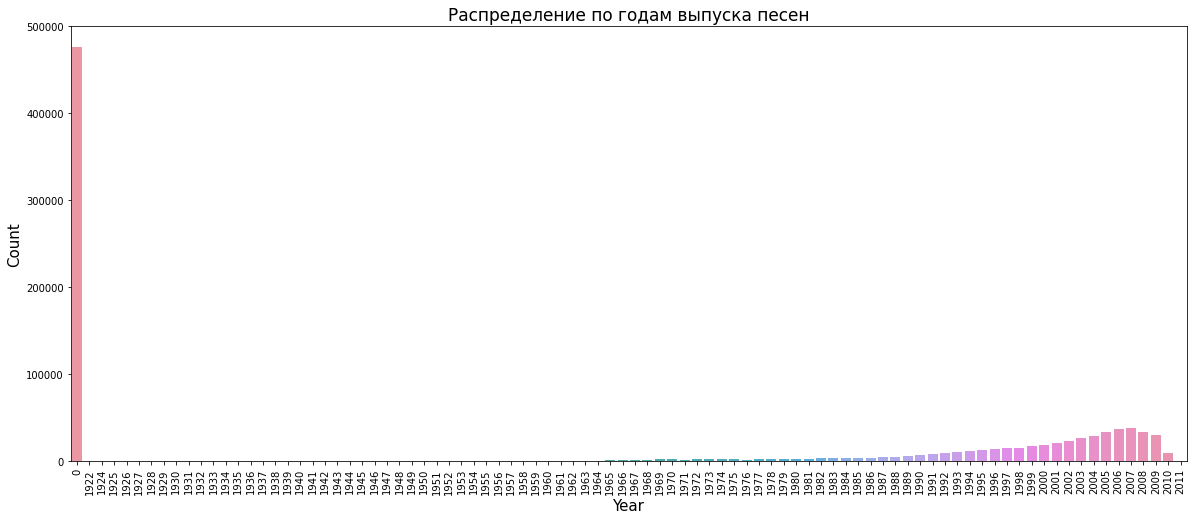

In [58]:
fig = plt.figure(figsize = (20, 8))

ax = sns.countplot(x='year', data=song_df);
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.title('Распределение по году выпуска трека', fontsize=17)
plt.ylabel('Count', fontsize=15);
plt.xlabel('Year', fontsize=15);

In [60]:
print(f'Минимальный год выхода трека: {song_data.year[song_data.year > 0].min()}')
print(f'Максимальный год выхода трека: {song_data.year[song_data.year > 0].max()}')
print(f'Количество треков, для которых определен год: {song_data.song_id[song_data.year > 0].count()}')

Минимальный год выхода трека: 1922
Максимальный год выхода трека: 2011
Количество треков, для которых определен год: 503890


Посмотрим на распределение треков по жанрам и стилям.

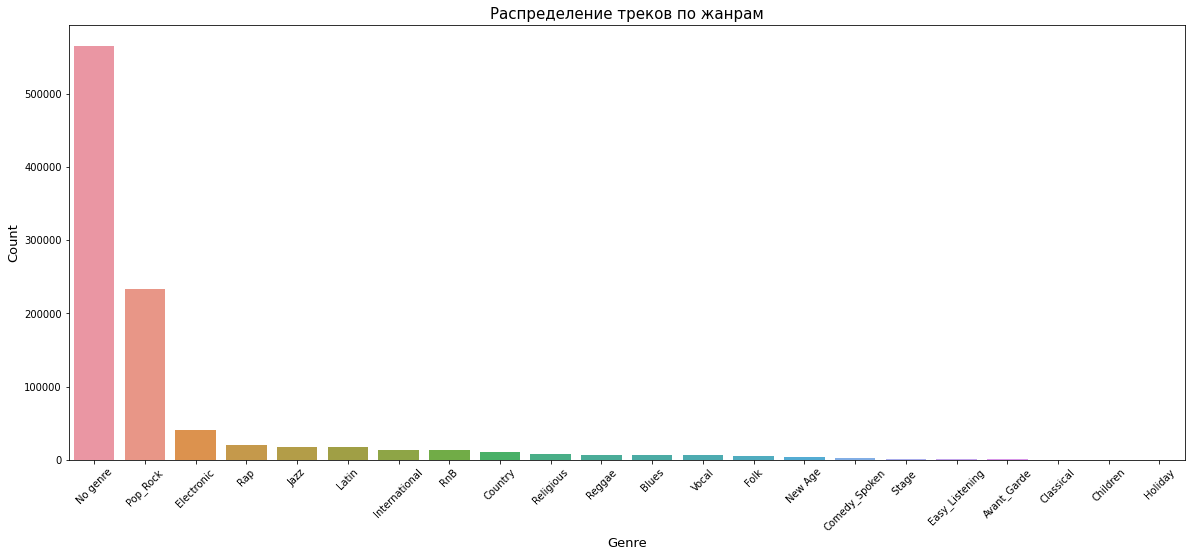

In [65]:
fig = plt.figure(figsize = (20, 8))

ax = sns.countplot(x='genre', data=song_df, order=song_df['genre'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

plt.title('Распределение треков по жанрам', fontsize=15)
plt.ylabel('Count', fontsize=13);
plt.xlabel('Genre', fontsize=13);

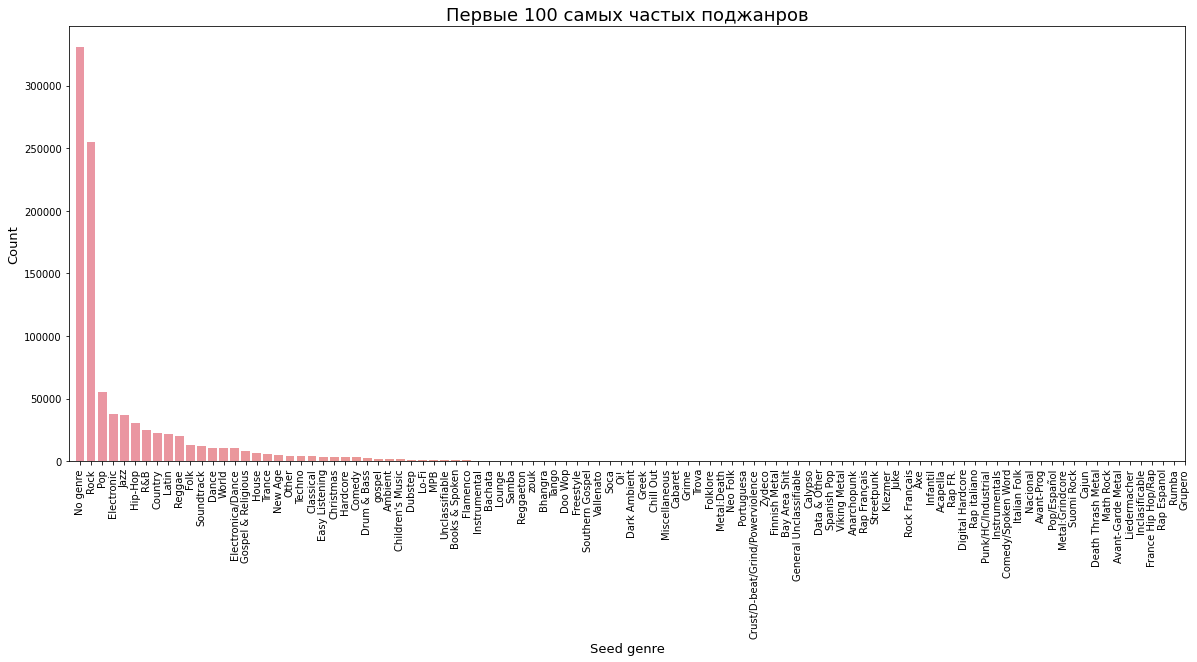

In [63]:
fig = plt.figure(figsize = (20, 8))

ax = sns.countplot(x='seed_genre', data=song_df, order=song_df['seed_genre'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.xlim(-1, 100)

plt.title('Первые 100 самых частых поджанров', fontsize=18)
plt.ylabel('Count', fontsize=13);
plt.xlabel('Seed genre', fontsize=13);

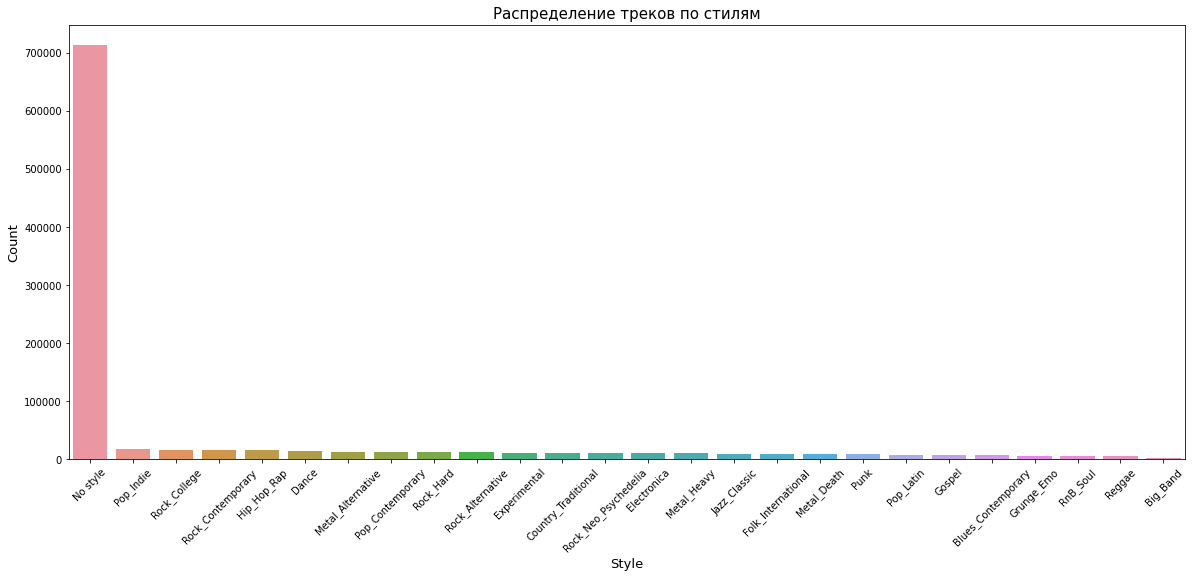

In [67]:
fig = plt.figure(figsize = (20, 8))

ax = sns.countplot(x='style', data=song_df, order=song_df['style'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

plt.title('Распределение треков по стилям', fontsize=15)
plt.ylabel('Count', fontsize=13);
plt.xlabel('Style', fontsize=13);

### Объединение всех датасетов

In [86]:
user_song_df = pd.merge(triplets_data, song_df, on='song_id', how='inner')
user_song_df.head()

,user_id,song_id,play_count,title,release,artist_name,year,track_id,seed_genre,genre,style
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,Nothing from Nothing,To Die For,Billy Preston,1974,TRIRLYL128F42539D1,R&B,No genre,No style
1,fd13b9d49c54e00ff413fe3c095ba581c7fc611e,SOAPDEY12A81C210A9,8,Nothing from Nothing,To Die For,Billy Preston,1974,TRIRLYL128F42539D1,R&B,No genre,No style
2,35752a9e4d917c8fc5da88e90c25adc6b52220b6,SOAPDEY12A81C210A9,1,Nothing from Nothing,To Die For,Billy Preston,1974,TRIRLYL128F42539D1,R&B,No genre,No style
3,bfe8d6d1e32d9de12c632d68712e7e4a23416e93,SOAPDEY12A81C210A9,1,Nothing from Nothing,To Die For,Billy Preston,1974,TRIRLYL128F42539D1,R&B,No genre,No style
4,46d3ef1b4f317aba8f0226e937c67ecef9fa2e42,SOAPDEY12A81C210A9,4,Nothing from Nothing,To Die For,Billy Preston,1974,TRIRLYL128F42539D1,R&B,No genre,No style


In [87]:
user_song_df.shape

(45795099, 11)

# Исследование данных

### Топ 20 самых популярных песен
Определим самые популярные треки на основе количества пользователей, прослушавших данный трек.

In [125]:
song_grouped_cnt = user_song_df.groupby(['song_id', 'title', 'artist_name'], as_index=False).agg({'play_count': 'count'}) \
                               .rename(columns={'play_count': 'user_count'}).sort_values('user_count', ascending=False)
song_grouped_cnt.head()

,song_id,title,artist_name,user_count
14093,SOAXGDH12A8C13F8A1,Dog Days Are Over (Radio Edit),Florence + The Machine,90444
24628,SOBONKR12A58A7A7E0,You're The One,Dwight Yoakam,84000
282749,SOSXLTC12AF72A7F54,Revelry,Kings Of Leon,80656
213013,SONYKOW12AB01849C9,Secrets,OneRepublic,78353
66808,SOEGIYH12A6D4FC0E3,Horn Concerto No. 4 in E flat K495: II. Romanc...,Barry Tuckwell/Academy of St Martin-in-the-Fie...,69487


In [126]:
grouped_sum = song_grouped_cnt.user_count.sum()

song_grouped_cnt['persentage_cnt'] = (song_grouped_cnt.user_count / grouped_sum) * 100
song_grouped_cnt.head(20)

,song_id,title,artist_name,user_count,persentage_cnt
14093,SOAXGDH12A8C13F8A1,Dog Days Are Over (Radio Edit),Florence + The Machine,90444,0.197497
24628,SOBONKR12A58A7A7E0,You're The One,Dwight Yoakam,84000,0.183426
282749,SOSXLTC12AF72A7F54,Revelry,Kings Of Leon,80656,0.176124
213013,SONYKOW12AB01849C9,Secrets,OneRepublic,78353,0.171095
66808,SOEGIYH12A6D4FC0E3,Horn Concerto No. 4 in E flat K495: II. Romanc...,Barry Tuckwell/Academy of St Martin-in-the-Fie...,69487,0.151735
173547,SOLFXKT12AB017E3E0,Fireflies,Charttraxx Karaoke,64229,0.140253
85645,SOFLJQZ12A6D4FADA6,Tive Sim,Cartola,58610,0.127983
307663,SOUSMXX12AB0185C24,OMG,Usher featuring will.i.am,53260,0.116301
326421,SOWCKVR12A8C142411,Use Somebody,Kings Of Leon,52080,0.113724
309341,SOUVTSM12AC468F6A7,Drop The World,Lil Wayne / Eminem,51022,0.111414


Определим самые популярные треки на основе количества прослушиваний каждого трека.

In [127]:
song_grouped_sum = user_song_df.groupby(['song_id', 'title', 'artist_name'], as_index=False).agg({'play_count': 'sum'}) \
                               .rename(columns={'play_count': 'sum_play_count'}).sort_values('sum_play_count', ascending=False)
song_grouped_sum.head()

,song_id,title,artist_name,sum_play_count
24628,SOBONKR12A58A7A7E0,You're The One,Dwight Yoakam,223446
14093,SOAXGDH12A8C13F8A1,Dog Days Are Over (Radio Edit),Florence + The Machine,219038
282749,SOSXLTC12AF72A7F54,Revelry,Kings Of Leon,202174
213013,SONYKOW12AB01849C9,Secrets,OneRepublic,187221
66808,SOEGIYH12A6D4FC0E3,Horn Concerto No. 4 in E flat K495: II. Romanc...,Barry Tuckwell/Academy of St Martin-in-the-Fie...,171011


In [128]:
grouped_sum = song_grouped_sum.sum_play_count.sum()

song_grouped_sum['persentage_sum'] = (song_grouped_sum.sum_play_count / grouped_sum) * 100
song_grouped_sum.head(20)

,song_id,title,artist_name,sum_play_count,persentage_sum
24628,SOBONKR12A58A7A7E0,You're The One,Dwight Yoakam,223446,0.252957
14093,SOAXGDH12A8C13F8A1,Dog Days Are Over (Radio Edit),Florence + The Machine,219038,0.247967
282749,SOSXLTC12AF72A7F54,Revelry,Kings Of Leon,202174,0.228875
213013,SONYKOW12AB01849C9,Secrets,OneRepublic,187221,0.211948
66808,SOEGIYH12A6D4FC0E3,Horn Concerto No. 4 in E flat K495: II. Romanc...,Barry Tuckwell/Academy of St Martin-in-the-Fie...,171011,0.193597
173547,SOLFXKT12AB017E3E0,Fireflies,Charttraxx Karaoke,141670,0.160381
85645,SOFLJQZ12A6D4FADA6,Tive Sim,Cartola,127642,0.144500
239163,SOPUCYA12A8C13A694,Canada,Five Iron Frenzy,116773,0.132195
307663,SOUSMXX12AB0185C24,OMG,Usher featuring will.i.am,114676,0.129821
121080,SOHTKMO12AB01843B0,Catch You Baby (Steve Pitron & Max Sanna Radio...,Lonnie Gordon,110608,0.125216


In [129]:
song_grouped_cnt = song_grouped_cnt.head(25)
song_grouped_sum = song_grouped_sum.head(25)

In [130]:
pd.merge(song_grouped_cnt, song_grouped_sum.drop(['title', 'artist_name'], axis=1), on='song_id', how='inner').head(20)

,song_id,title,artist_name,user_count,persentage_cnt,sum_play_count,persentage_sum
0,SOAXGDH12A8C13F8A1,Dog Days Are Over (Radio Edit),Florence + The Machine,90444,0.197497,219038,0.247967
1,SOBONKR12A58A7A7E0,You're The One,Dwight Yoakam,84000,0.183426,223446,0.252957
2,SOSXLTC12AF72A7F54,Revelry,Kings Of Leon,80656,0.176124,202174,0.228875
3,SONYKOW12AB01849C9,Secrets,OneRepublic,78353,0.171095,187221,0.211948
4,SOEGIYH12A6D4FC0E3,Horn Concerto No. 4 in E flat K495: II. Romanc...,Barry Tuckwell/Academy of St Martin-in-the-Fie...,69487,0.151735,171011,0.193597
5,SOLFXKT12AB017E3E0,Fireflies,Charttraxx Karaoke,64229,0.140253,141670,0.160381
6,SOFLJQZ12A6D4FADA6,Tive Sim,Cartola,58610,0.127983,127642,0.144500
7,SOUSMXX12AB0185C24,OMG,Usher featuring will.i.am,53260,0.116301,114676,0.129821
8,SOWCKVR12A8C142411,Use Somebody,Kings Of Leon,52080,0.113724,109240,0.123668
9,SOUVTSM12AC468F6A7,Drop The World,Lil Wayne / Eminem,51022,0.111414,107085,0.121228


### Топ 20 самых популярных исполнителей

In [134]:
artist_grouped_cnt = user_song_df.groupby(['artist_name'], as_index=False).agg({'play_count': 'count'}) \
                                 .rename(columns={'play_count': 'listen_count'}).sort_values('listen_count', ascending=False)

grouped_sum = artist_grouped_cnt.listen_count.sum()
artist_grouped_cnt['persentage'] = (artist_grouped_cnt.listen_count / grouped_sum) * 100
artist_grouped_cnt.head(20)

,artist_name,listen_count,persentage
7238,Coldplay,341322,0.745324
19461,Kings Of Leon,247260,0.539927
12609,Florence + The Machine,235223,0.513642
35594,The Killers,204790,0.447188
16325,Jack Johnson,200993,0.438896
24791,Muse,189086,0.412896
18576,Justin Bieber,188485,0.411583
28534,Radiohead,182833,0.399241
34455,The Black Keys,176574,0.385574
8376,Daft Punk,175708,0.383683


### Исследование характеристик треков

In [149]:
data10000.head()

,artist_name,artist_familarity,artist_hotttnesss,artist_id,artist_location,danceability,duration,energy,loudness,mode,mode_confidence,song_hotttnesss,song_id,tempo,time_signature,time_signature_confidence,title,track_id,year
0,Casual,0.581794,0.401998,ARD7TVE1187B99BFB1,California - LA,0.0,218.93179,0.0,-11.197,0,0.636,0.602120,SOMZWCG12A8C13C480,92.198,4,0.778,I Didn't Mean To,TRAAAAW128F429D538,0
1,The Box Tops,0.630630,0.417500,ARMJAGH1187FB546F3,"Memphis, TN",0.0,148.03546,0.0,-9.843,0,0.430,NaN,SOCIWDW12A8C13D406,121.274,4,0.384,Soul Deep,TRAAABD128F429CF47,1969
2,Sonora Santanera,0.487357,0.343428,ARKRRTF1187B9984DA,NaN,0.0,177.47546,0.0,-9.689,1,0.565,NaN,SOXVLOJ12AB0189215,100.070,1,0.000,Amor De Cabaret,TRAAADZ128F9348C2E,0
3,Adam Ant,0.630382,0.454231,AR7G5I41187FB4CE6C,"London, England",0.0,233.40363,0.0,-9.013,1,0.749,NaN,SONHOTT12A8C13493C,119.293,4,0.000,Something Girls,TRAAAEF128F4273421,1982
4,Gob,0.651046,0.401724,ARXR32B1187FB57099,NaN,0.0,209.60608,0.0,-4.501,1,0.371,0.604501,SOFSOCN12A8C143F5D,129.738,4,0.562,Face the Ashes,TRAAAFD128F92F423A,2007


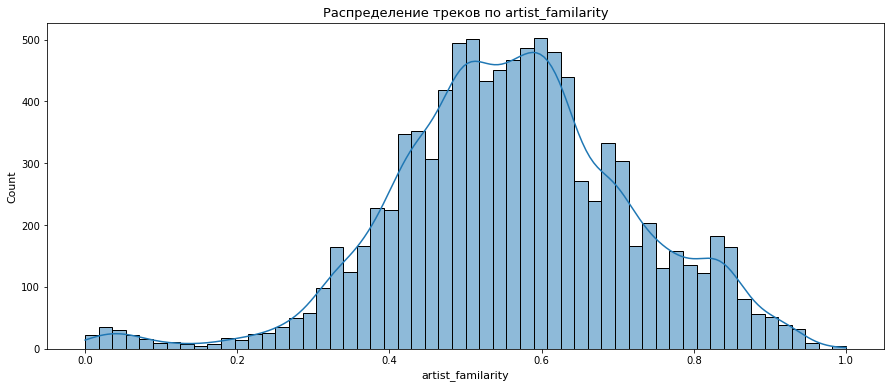

In [158]:
fig = plt.figure(figsize = (15, 6))

ax = sns.histplot(x='artist_familarity', data=data10000, kde=True);

plt.title('Распределение треков по artist_familarity', fontsize=13);
plt.ylabel('Count', fontsize=11);
plt.xlabel('artist_familarity',  fontsize=11);

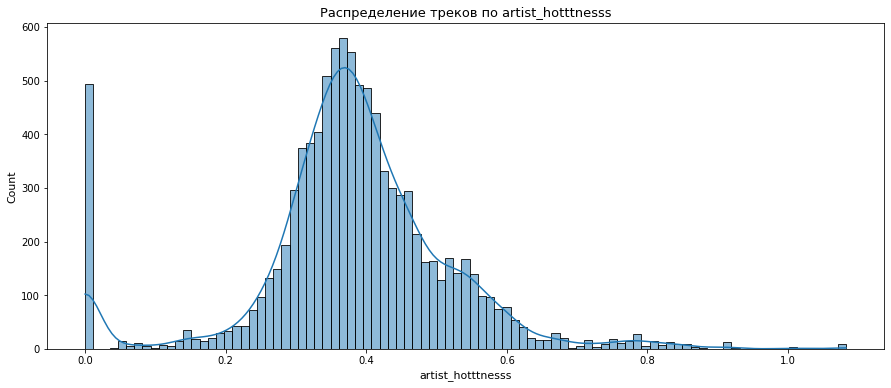

In [159]:
fig = plt.figure(figsize = (15, 6))

ax = sns.histplot(x='artist_hotttnesss', data=data10000, kde=True);

plt.title('Распределение треков по artist_hotttnesss', fontsize=13);
plt.ylabel('Count', fontsize=11);
plt.xlabel('artist_hotttnesss',  fontsize=11);

In [165]:
data10000['mode'].describe()

count    9766.000000
mean        0.690457
std         0.462329
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: mode, dtype: float64

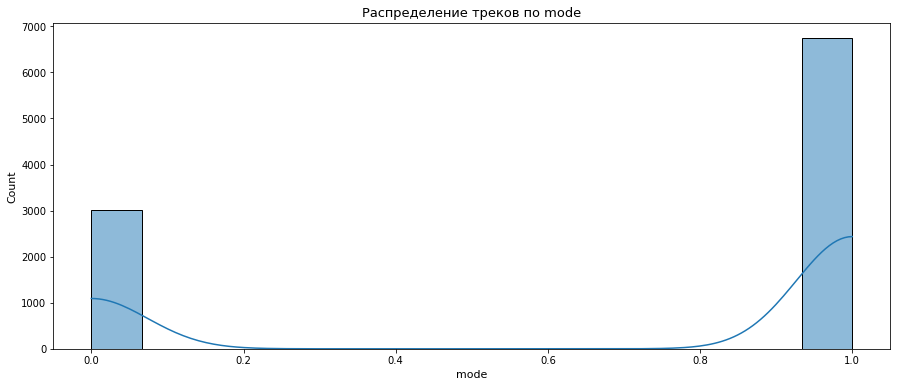

In [166]:
fig = plt.figure(figsize = (15, 6))

ax = sns.histplot(x='mode', data=data10000, kde=True);

plt.title('Распределение треков по mode', fontsize=13);
plt.ylabel('Count', fontsize=11);
plt.xlabel('mode',  fontsize=11);